# Testing

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [2]:
df_cb513_2 = pd.read_csv(f"../Data/Postprocessed/cb513_2_dssp.csv")
df_test_cb513_2 = pd.read_csv(f"../Data/Preprocessed/cb513_preprocessed.csv") # Original dataset

## Cleaning

In [3]:
df_cb513_2.head()

,id,length,residue,predicted_dssp8
0,0,67,VPSLATISLENSWSGLSKQIQLAQGNNGIFRTPIVLVDNKGNRVQI...,---HHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEEE-TTS-EEEE...
1,1,87,MFKVYGYDSNIHKCVYCDNAKRLLTVKKQPFEFINIMPEKGVFDDE...,-EEEEE--TTTS--HHHHHHHHHHHHTT--EEEEES-SBTTB--HH...
2,2,449,TPEMPVLENRAAQGNITAPGGARRLTGDQTAALRNSLSDKPAKNII...,--SS---S--S--S-TTSTTTT-S-SS--HHHHHHT---SPPSEEE...
3,3,108,APAFSVSPASGASDGQSVSVSVAAAGETYYIAQCAPVGGQDACNPA...,--EEEEES-SSBPTT-EEEEEEE--SSEEEEEEEEEETTEEEE-TT...
4,4,349,TPAFNKPKVELHVHLDGAIKPETILYFGKKRGIALPADTVEELRNI...,--S--S-EEEEEEESTTS--HHHHHHHHHHHT---S-SSHHHHHHH...


In [4]:
df_test_cb513_2

,id,length,residue,dssp8,dssp3
0,0,67,VPSLATISLENSWSGLSKQIQLAQGNNGIFRTPIVLVDNKGNRVQI...,LLLHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEELLSSSSLEEE...,CCCHHHHHHHHHHHHHHHHHHHHCCCCCEEEEEEEECCCCCCCEEE...
1,1,87,MFKVYGYDSNIHKCVYCDNAKRLLTVKKQPFEFINIMPEKGVFDDE...,LEEEEELLTTTSLLHHHHHHHHHHHHTTLLEEEEESLSBTTBLLHH...,CEEEEECCCCCCCCHHHHHHHHHHHHCCCCEEEEECCCECCECCHH...
2,2,449,TPEMPVLENRAAQGNITAPGGARRLTGDQTAALRNSLSDKPAKNII...,LLLLLLLLLLSLLSLTTSTTTTLLLSSLLHHHHHHHLLLSLLSEEE...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHCCCCCCCEEE...
3,3,108,APAFSVSPASGASDGQSVSVSVAAAGETYYIAQCAPVGGQDACNPA...,LLEEEEELLSSLLSSLEEEEEEESLLSEEEEEEELEETTEELLLTT...,CCEEEEECCCCCCCCCEEEEEEECCCCEEEEEEECEECCEECCCCC...
4,4,349,TPAFNKPKVELHVHLDGAIKPETILYFGKKRGIALPADTVEELRNI...,LLSLLSLEEEEEEEGGGSLLHHHHHHHHHHHTLLLSLSSHHHHHHH...,CCCCCCCEEEEEEEHHHCCCHHHHHHHHHHHCCCCCCCCHHHHHHH...
...,...,...,...,...,...
509,509,171,XRCGEQGSNMECPNNLCCSQYGYCGMGGDYCGKGCQNGACWTSKRC...,LLLBGGGTTBLLGGGLEELTTSLEELSHHHHSTTLLSSSLSSLLBL...,CCCEHHHCCECCHHHCEECCCCCEECCHHHHCCCCCCCCCCCCCEC...
510,510,211,MYGNWGRFIRVNLSTGDIKVEEYDEELAKKWLGSRGLAIYLLLKEM...,LLSSLSEEEEEETTTTEEEEEELLHHHHHHHLSHHHHHHHHHHHHS...,CCCCCCEEEEEECCCCEEEEEECCHHHHHHHCCHHHHHHHHHHHHC...
511,511,291,MPPITQQATVTAWLPQVDASQITGTISSLESFTNRFYTTTSGAQAS...,LLLLLLHHHHHHHGGGLLHHHHHHHHHHHHTSSLLLTTSHHHHHHH...,CCCCCCHHHHHHHHHHCCHHHHHHHHHHHHCCCCCCCCCHHHHHHH...
512,512,700,XRAKVAMSHFEPHEYIRYDLLEKNIDIVRKRLNRPLTLSEKIVYGH...,LLSLLBSLSSLTTSBLLHHHHHHHHHHHHHHHLSLLLHHHHHHHTT...,CCCCCECCCCCCCCECCHHHHHHHHHHHHHHHCCCCCHHHHHHHCC...


| Code | Structure                     |
|------|-------------------------------|
| H    | Alpha helix (4-12)            |
| B    | Isolated beta-bridge residue  |
| E    | Strand                        |
| G    | 3-10 helix                    |
| I    | Pi helix                      |
| T    | Turn                          |
| S    | Bend                          |
| C    | Coil                          | 

- Some dataset may use different code for the last structure, such as space '' or 'L', but in this case we use 'C'
- DSSP version 4 predicts can predict P state but it is not used in this case, so we convert it to 'C' because it is not a common structure https://chatgpt.com/share/681d8142-dd3c-8005-a045-f54247344b66

In [5]:
# Standarkan format struktur sekunder prediksi menggunakan regex
df_cb513_2['predicted_dssp8'] = df_cb513_2['predicted_dssp8'].str.replace('-', 'C', regex=True)
df_cb513_2['predicted_dssp8'] = df_cb513_2['predicted_dssp8'].str.replace('P', 'C', regex=True)

In [6]:
# Standarkan format struktur sekunder prediksi menggunakan regex
df_test_cb513_2['dssp8'] = df_test_cb513_2['dssp8'].str.replace('L', 'C', regex=True)

In [7]:
# Merge the two DataFrames on the 'id' column
df_merged = pd.merge(df_cb513_2, df_test_cb513_2, on='id', suffixes=('_predicted', '_actual'))

df_merged[['dssp8', 'predicted_dssp8']]

,dssp8,predicted_dssp8
0,CCCHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEECCSSSSCEEE...,CCCHHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEEECTTSCEEEE...
1,CEEEEECCTTTSCCHHHHHHHHHHHHTTCCEEEEESCSBTTBCCHH...,CEEEEECCTTTSCCHHHHHHHHHHHHTTCCEEEEESCSBTTBCCHH...
2,CCCCCCCCCCSCCSCTTSTTTTCCCSSCCHHHHHHHCCCSCCSEEE...,CCSSCCCSCCSCCSCTTSTTTTCSCSSCCHHHHHHTCCCSCCSEEE...
3,CCEEEEECCSSCCSSCEEEEEEESCCSEEEEEEECEETTEECCCTT...,CCEEEEESCSSBCTTCEEEEEEECCSSEEEEEEEEEETTEEEECTT...
4,CCSCCSCEEEEEEEGGGSCCHHHHHHHHHHHTCCCSCSSHHHHHHH...,CCSCCSCEEEEEEESTTSCCHHHHHHHHHHHTCCCSCSSHHHHHHH...
...,...,...
503,CCSSCCCTHHHHHHHHHHHGGGCBCCCTTC,CCCSCCCTTHHHHHHHHHHHHTCSSCCCCC
504,CCSCEETTTTTCCCCCCBCCSSBCHHHHHHHHHHHHHHHHHHSCCC...,CCSCEETTTTTCCCCCCBCTTSBCHHHHHHHHHHHHHHHHHHSCCC...
505,CCSSCSEEEEEETTTTEEEEEECCHHHHHHHCSHHHHHHHHHHHHS...,CCSCCSEEEEEETTTCCEEEEECCHHHHHHHCSTHHHHHHHHHHHS...
506,CCCCCCHHHHHHHGGGCCHHHHHHHHHHHHTSSCCCTTSHHHHHHH...,CCCCCCHHHHHHHGGGCCHHHHHHHHHHHHTSSCCCTTSHHHHHHH...


## Definisi fungsi

$$Q_s =  \frac{∑^s_{i=1} C_i}{n}×100\%$$

Dengan:
- $C_i$ = Jumlah residu yang terprediksi dengan benar
- $n$ = Jumlah residu yang terprediksi
- $s$ = Jumlah State yang ada (8 state atau 3 state)

In [8]:
def calculate_q_score(predicted, actual):
    """
    Menghitung Q_s untuk satu protein.
    
    Args:
        predicted (str): Struktur sekunder yang diprediksi.
        actual (str): Struktur sekunder yang sebenarnya.
    
    Returns:
        float: Nilai Q_s dalam persen.
    """
    correct = sum(1 for p, a in zip(predicted, actual) if p == a)
    total = len(actual)
    return (correct / total) * 100 if total > 0 else 0

$$Q_{avg} = \frac{\sum{Q_s}}{n_{protein}}$$

Dengan:
- $Q_{avg}$ = Akurasi skor-Q rata-rata dari semua protein
- $Q_s$ = Akurasi skor-Q dari setiap protein
- $n_{protein}$ = Jumlah protein yang diuji

In [9]:
def calculate_q_average(predicted_list, actual_list):
    """
    Menghitung Q_avg untuk semua protein dalam dataset.
    
    Args:
        predicted_list (list of str): Daftar struktur sekunder yang diprediksi.
        actual_list (list of str): Daftar struktur sekunder yang sebenarnya.
    
    Returns:
        float: Nilai Q_avg dalam persen.
    """
    q_scores = [calculate_q_score(predicted, actual) for predicted, actual in zip(predicted_list, actual_list)]
    return sum(q_scores) / len(q_scores) if q_scores else 0

In [10]:
def convert_8state_to_3state(ss):
    ss_3state = ""
    for s in ss:
        if s in ['H', 'G', 'I']:
            ss_3state += 'H'
        elif s in ['E', 'B']:
            ss_3state += 'E'
        else:
            ss_3state += 'C'
    return ss_3state

In [11]:
def calculate_metrics(y_true, y_pred, classes, csv_path=None):
    """
    Calculate precision, recall, and F1-score for given classes and optionally save to CSV.

    Args:
        y_true (list): True labels (flattened).
        y_pred (list): Predicted labels (flattened).
        classes (list): List of class labels.
        csv_path (str, optional): Path to save the metrics DataFrame as CSV.

    Returns:
        pd.DataFrame: DataFrame containing metrics per class and average.
    """

    min_len = min(len(y_true), len(y_pred))
    y_true = y_true[:min_len]
    y_pred = y_pred[:min_len]

    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=classes, zero_division=0
    )

    metrics_df = pd.DataFrame({
        'Class': classes,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    avg_row = pd.DataFrame({
        'Class': ['Average'],
        'Precision': [precision.mean()],
        'Recall': [recall.mean()],
        'F1-Score': [f1.mean()]
    })

    metrics_df = pd.concat([metrics_df, avg_row], ignore_index=True)

    if csv_path:
        metrics_df.to_csv(csv_path, index=False)

    return metrics_df

## Akurasi Q8

In [12]:
predicted_list = df_merged['predicted_dssp8'].tolist()  # Struktur sekunder yang diprediksi
actual_list = df_merged['dssp8'].tolist()  # Struktur sekunder yang sebenarnya

q8_avg = calculate_q_average(predicted_list, actual_list)
print(f"Q8_avg: {q8_avg:.2f}%")

Q8_avg: 88.77%


## Precision, Recall, dan F1-Score

In [13]:
# Define the 8 DSSP classes
dssp8_classes = ['C', 'B', 'E', 'G', 'I', 'H', 'S', 'T']

# Flatten all predicted and actual secondary structure strings into lists of single characters
y_pred = [ss for seq in df_merged['predicted_dssp8'] for ss in seq]
y_true = [ss for seq in df_merged['dssp8'] for ss in seq]

metrics_df = calculate_metrics(y_true, y_pred, dssp8_classes, '../Data/Results/cb513_2_metrics.csv')
print(metrics_df)

     Class  Precision    Recall  F1-Score
0        C   0.750563  0.737437  0.743942
1        B   0.538682  0.493438  0.515068
2        E   0.890025  0.902219  0.896081
3        G   0.690321  0.722947  0.706257
4        I   0.041860  0.600000  0.078261
5        H   0.924195  0.937827  0.930961
6        S   0.660814  0.594175  0.625725
7        T   0.688409  0.692605  0.690500
8  Average   0.648109  0.710081  0.648349


## Akurasi Q3

In [14]:
predicted_list_3state = [convert_8state_to_3state(ss) for ss in predicted_list]
actual_list_3state = [convert_8state_to_3state(ss) for ss in actual_list]

q3_avg = calculate_q_average(predicted_list_3state, actual_list_3state)
print(f"Q3_avg: {q3_avg:.2f}%")

Q3_avg: 93.48%


## Precision, Recall, dan F1-Score

In [15]:
# Define DSSP 3-state classes
dssp3_classes = ['H', 'E', 'C']

# Flatten all predicted and actual secondary structure strings into lists of single characters
y_pred3 = [ss for seq in predicted_list_3state for ss in seq]
y_true3 = [ss for seq in actual_list_3state for ss in seq]

metrics_df_3state = calculate_metrics(y_true3, y_pred3, dssp3_classes, '../Data/Results/cb513_2_metrics_3state.csv')
print(metrics_df_3state)

     Class  Precision    Recall  F1-Score
0        H   0.908558  0.937640  0.922870
1        E   0.879531  0.886360  0.882933
2        C   0.890924  0.864116  0.877315
3  Average   0.893005  0.896039  0.894373


# Visualisasi

## 8-State

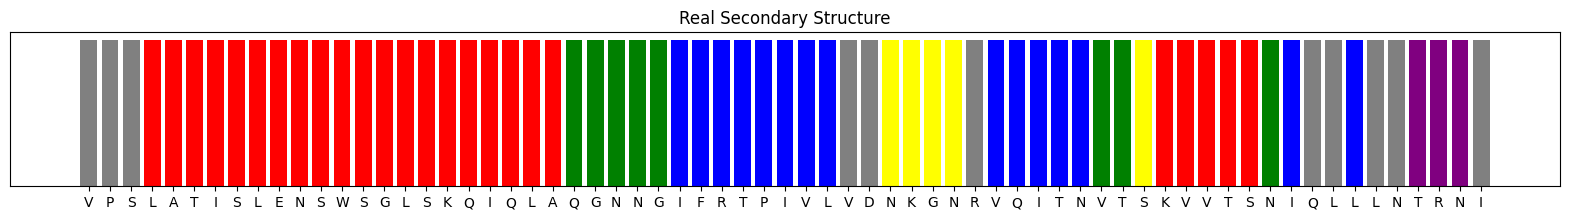

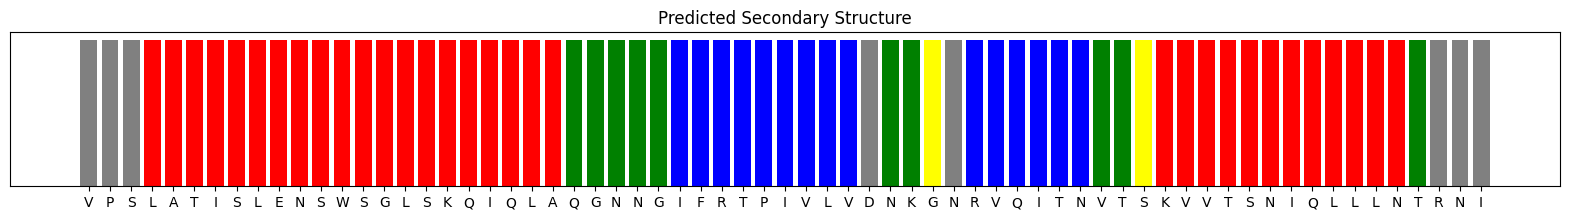

In [16]:
# Get the residue of the first protein
residu = df_cb513_2['residue'].iloc[0]

# Get the first protein's dssp8 predicted and actual secondary structure
predicted_ss = df_merged['predicted_dssp8'].iloc[0]
actual_ss = df_merged['dssp8'].iloc[0]

# Define colors for secondary structure elements using 8-state DSSP
colors = {'H': 'red', 'B': 'blue', 'E': 'blue', 'G': 'purple', 'I': 'orange', 'T': 'green', 'S': 'yellow', 'C': 'gray'}
# Plot
fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(actual_ss)), [1]*len(actual_ss), color=[colors[ss] for ss in actual_ss])
ax.set_xticks(range(len(actual_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Real Secondary Structure")

fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(predicted_ss)), [1]*len(predicted_ss), color=[colors[predicted_ss] for predicted_ss in predicted_ss])
ax.set_xticks(range(len(predicted_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Predicted Secondary Structure")

plt.show()

In [17]:
# Akurasi Q8 protein pertama
q8_first_protein = calculate_q_score(predicted_ss, actual_ss)
print(f"Q8 for the first protein: {q8_first_protein:.2f}%")

Q8 for the first protein: 77.61%


## 3-State

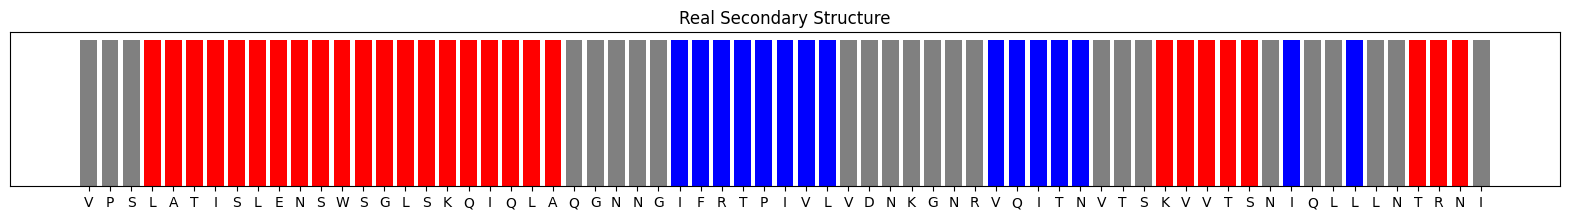

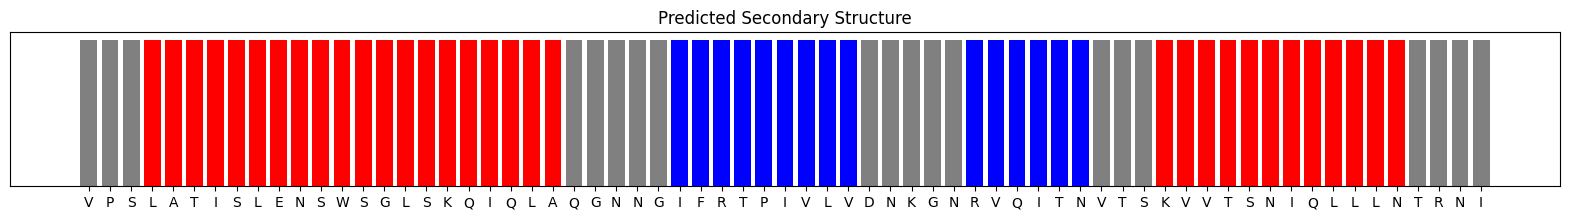

In [18]:
# Get the residue of the first protein
residu = df_cb513_2['residue'].iloc[0]

# Get the first protein's dssp3 predicted and actual secondary structure
predicted_ss = predicted_list_3state[0]
actual_ss = actual_list_3state[0]

# Define colors for secondary structure elements using 3-state DSSP
colors = {'H': 'red', 'E': 'blue', 'C': 'gray'}

# Plot
fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(actual_ss)), [1]*len(actual_ss), color=[colors[ss] for ss in actual_ss])
ax.set_xticks(range(len(actual_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Real Secondary Structure")

fig, ax = plt.subplots(figsize=(20, 2))
ax.bar(range(len(predicted_ss)), [1]*len(predicted_ss), color=[colors[predicted_ss] for predicted_ss in predicted_ss])
ax.set_xticks(range(len(predicted_ss)))
ax.set_xticklabels(residu, rotation=0, fontsize=10)
ax.set_yticks([])
ax.set_title("Predicted Secondary Structure")

plt.show()

In [19]:
# Akurasi Q3 protein pertama
q3 = calculate_q_score(predicted_ss, actual_ss)
print(f"Q3 for the first protein: {q3:.2f}%")

Q3 for the first protein: 82.09%
